# Installing STUMPY

Since STUMPY is not installed natively, we'll need to [install it](https://stumpy.readthedocs.io/en/latest/install.html):

In [ ]:
!pip install stumpy  # Omit the "!" if you are working directly in the command line 

#Or use the following command to install the development version with the latest features
#!pip install git+https://github.com/TDAmeritrade/stumpy.git

     |████████████████████████████████| 71kB 3.0MB/s 


# Import Packages

In [ ]:
import numpy as np
import stumpy
import time
import pandas as pd
import stumpy
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as dates
from matplotlib.patches import Rectangle
import datetime as dt
import urllib
import ssl
import io
import os

# Loading Data from dataframe.pkl

The data is loading from google drive 

```

The data will have 22634 rows X 1273 columbs 
Rows indicate patient index
Columns indicate amino acid index 
```




In [ ]:
#from google.colab import drive
#drive.mount('/content/drive/', force_remount=True)
#os.chdir("/content/drive/My Drive/Colab Notebooks/Stumpy")
#os.listdir()
#https://drive.google.com/file/d/1WlHOzn_XEUSAnhPkv5Fb11mgHfVDiO0M/view?usp=sharing
!gdown --id 1WlHOzn_XEUSAnhPkv5Fb11mgHfVDiO0M
columb_index=[0,1,613]
unpickled_df = pd.read_pickle("./global_dataframe.pkl")
unpickled_df=unpickled_df.astype(float) 

unpickled_df.head()



Mounted at /content/drive/


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,1233,1234,1235,1236,1237,1238,1239,1240,1241,1242,1243,1244,1245,1246,1247,1248,1249,1250,1251,1252,1253,1254,1255,1256,1257,1258,1259,1260,1261,1262,1263,1264,1265,1266,1267,1268,1269,1270,1271,1272
patient0,13.0,6.0,22.0,6.0,12.0,22.0,12.0,12.0,16.0,12.0,22.0,19.0,19.0,17.0,3.0,22.0,14.0,12.0,20.0,20.0,18.0,20.0,17.0,12.0,16.0,16.0,1.0,25.0,20.0,14.0,19.0,6.0,20.0,18.0,7.0,22.0,25.0,25.0,16.0,4.0,...,12.0,3.0,3.0,13.0,20.0,19.0,3.0,3.0,19.0,3.0,12.0,11.0,7.0,3.0,3.0,19.0,3.0,7.0,19.0,3.0,3.0,11.0,6.0,4.0,5.0,4.0,4.0,19.0,5.0,16.0,22.0,12.0,11.0,7.0,22.0,11.0,12.0,8.0,25.0,20.0
patient1,13.0,6.0,22.0,6.0,12.0,22.0,12.0,12.0,16.0,12.0,22.0,19.0,19.0,17.0,3.0,22.0,14.0,12.0,20.0,20.0,18.0,20.0,17.0,12.0,16.0,16.0,1.0,25.0,20.0,14.0,19.0,6.0,20.0,18.0,7.0,22.0,25.0,25.0,16.0,4.0,...,12.0,3.0,3.0,13.0,20.0,19.0,3.0,3.0,19.0,3.0,12.0,11.0,7.0,3.0,3.0,19.0,3.0,7.0,19.0,3.0,3.0,11.0,6.0,4.0,5.0,4.0,4.0,19.0,5.0,16.0,22.0,12.0,11.0,7.0,22.0,11.0,12.0,8.0,25.0,20.0
patient2,13.0,6.0,22.0,6.0,12.0,22.0,12.0,12.0,16.0,12.0,22.0,19.0,19.0,17.0,3.0,22.0,14.0,12.0,20.0,20.0,18.0,20.0,17.0,12.0,16.0,16.0,1.0,25.0,20.0,14.0,19.0,6.0,20.0,18.0,7.0,22.0,25.0,25.0,16.0,4.0,...,12.0,3.0,3.0,13.0,20.0,19.0,3.0,3.0,19.0,3.0,12.0,11.0,7.0,3.0,3.0,19.0,3.0,7.0,19.0,3.0,3.0,11.0,6.0,4.0,5.0,4.0,4.0,19.0,5.0,16.0,22.0,12.0,11.0,7.0,22.0,11.0,12.0,8.0,25.0,20.0
patient3,13.0,6.0,22.0,6.0,12.0,22.0,12.0,12.0,16.0,12.0,22.0,19.0,19.0,17.0,3.0,22.0,14.0,12.0,20.0,20.0,18.0,20.0,17.0,12.0,16.0,16.0,1.0,25.0,20.0,14.0,19.0,6.0,20.0,18.0,7.0,22.0,25.0,25.0,16.0,4.0,...,12.0,3.0,3.0,13.0,20.0,19.0,3.0,3.0,19.0,3.0,12.0,11.0,7.0,3.0,3.0,19.0,3.0,7.0,19.0,3.0,3.0,11.0,6.0,4.0,5.0,4.0,4.0,19.0,5.0,16.0,22.0,12.0,11.0,7.0,22.0,11.0,12.0,8.0,25.0,20.0
patient4,13.0,6.0,22.0,6.0,12.0,22.0,12.0,12.0,16.0,12.0,22.0,19.0,19.0,17.0,3.0,22.0,14.0,12.0,20.0,20.0,18.0,20.0,17.0,12.0,16.0,16.0,1.0,25.0,20.0,14.0,19.0,6.0,20.0,18.0,7.0,22.0,25.0,25.0,16.0,4.0,...,12.0,3.0,3.0,13.0,20.0,19.0,3.0,3.0,19.0,3.0,12.0,11.0,7.0,3.0,3.0,19.0,3.0,7.0,19.0,3.0,3.0,11.0,6.0,4.0,5.0,4.0,4.0,19.0,5.0,16.0,22.0,12.0,11.0,7.0,22.0,11.0,12.0,8.0,25.0,20.0


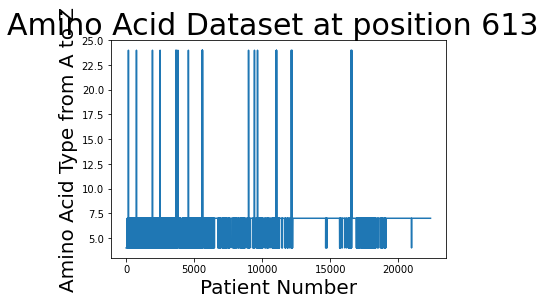

In [ ]:
plt.suptitle('Amino Acid Dataset at position 613', fontsize='30')
plt.xlabel('Patient Number', fontsize ='20')
plt.ylabel('Amino Acid Type from A to Z', fontsize='20')
plt.plot(unpickled_df[613].values)
plt.show()

###calculate standart deviation (Std) for each columb


In [ ]:
std=np.std(unpickled_df[261])
print(std)

std=np.std(unpickled_df,axis=0)
print(np.array(std))

K = 80 # We want the indices of the four largest values
a = np.array(std)
print(a[idx])
idx=np.argpartition(a,-K)[-K:]
print(idx)




2.444637266683503
[0.         0.13305803 0.23151776 ... 0.         0.         0.        ]
[1.23453104 1.30597053 1.24267771 1.25925518 1.28736947 1.31587221
 1.34139862 2.25050518 1.5909642  2.7814086  1.80026659 1.92097026
 1.37389517 1.94140557 2.29199936 1.48248621 1.60449926 1.64149844
 2.42803959 2.44463727 1.45428038 2.29529759 2.42549322 1.3828628
 1.60325393]
[ 316  271  292  198   66  179  520  470  464  455  302  281  284   48
  287  447  451  466  279  303  200  289  299  276  275  501  474  500
   79  496  309  221  479  290  295  197  482  483  484  844  485  495
  487  489  311  269  310  263  262  261  317  267  476  260  259  274
  308  305  277  503  929  613  280  512  282  514  515  286 1123  516
  300  517  518  519  446  445  291  521  297  293]


# Execute STUMPY

stump for normalized data

In [ ]:
m=500 #window size
start = time.time()
mp = stumpy.stump(unpickled_df[613], m, ignore_trivial=True)
print(time.time()-start)

12.081583023071289


aamp for un-normlaized data

In [ ]:
m=500 #window size
start = time.time()
mp = stumpy.aamp(unpickled_df[613], m, ignore_trivial=True)
print(time.time()-start)

6.418924570083618


#Plot Motive


In [ ]:
def change_plot_size(width, height, plt):
    fig_size = plt.rcParams["figure.figsize"]
    fig_size[0] = width
    fig_size[1] = height
    plt.rcParams["figure.figsize"] = fig_size
    plt.rcParams['xtick.direction'] = 'out'

change_plot_size(20, 6, plt)

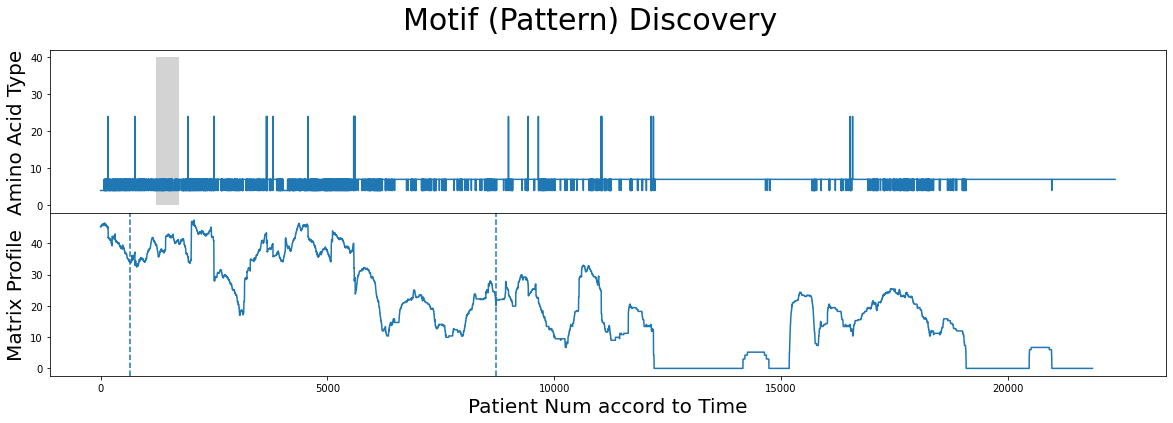

In [ ]:
fig, axs = plt.subplots(2, sharex=True, gridspec_kw={'hspace': 0})
plt.suptitle('Motif (Pattern) Discovery', fontsize='30')

axs[0].plot(unpickled_df[613].values)
axs[0].set_ylabel('Amino Acid Type', fontsize='20')
rect = Rectangle((1226, 0), m, 40, facecolor='lightgrey')
axs[0].add_patch(rect)
rect = Rectangle((1227, 0), m, 40, facecolor='lightgrey')
axs[0].add_patch(rect)
axs[1].set_xlabel('Patient Num accord to Time', fontsize ='20')
axs[1].set_ylabel('Matrix Profile', fontsize='20')
axs[1].axvline(x=643, linestyle="dashed")
axs[1].axvline(x=8724, linestyle="dashed")
axs[1].plot(mp[:, 0])
plt.show()

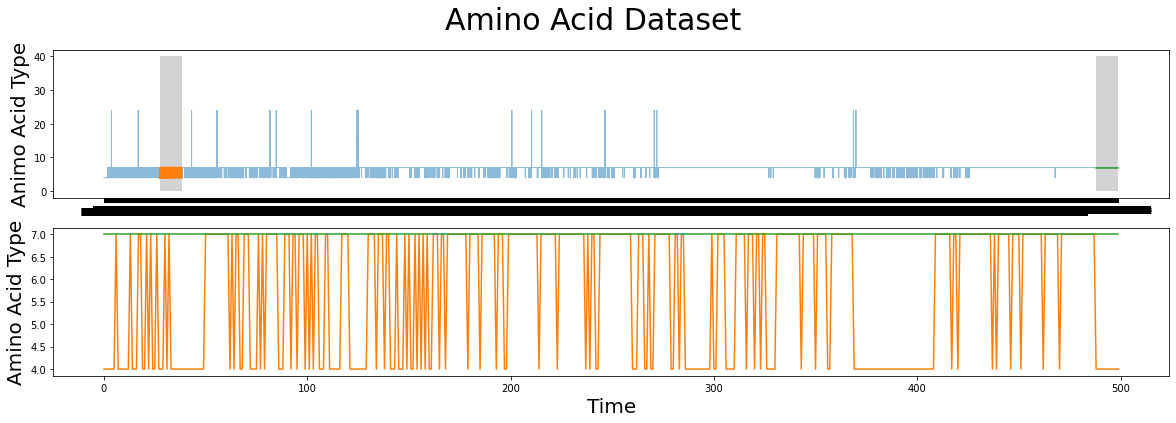

169.90766668319702


In [ ]:
start = time.time()
fig, axs = plt.subplots(2)
plt.suptitle('Amino Acid Dataset', fontsize='30')
axs[0].set_ylabel("Animo Acid Type", fontsize='20')
axs[0].plot(unpickled_df[613], alpha=0.5, linewidth=1)
axs[0].plot(unpickled_df[613].iloc[1226:1226+m])
axs[0].plot(unpickled_df[613].iloc[21865:21865+m])
rect = Rectangle((1226, 0), m, 40, facecolor='lightgrey')
axs[0].add_patch(rect)
rect = Rectangle((21865, 0), m, 40, facecolor='lightgrey')
axs[0].add_patch(rect)
axs[1].set_xlabel("Time", fontsize='20')
axs[1].set_ylabel("Amino Acid Type", fontsize='20')
axs[1].plot(unpickled_df[613].values[1226:1226+m], color='C1')
axs[1].plot(unpickled_df[613].values[21865:21865+m], color='C2')
plt.show()
print(time.time()-start)

#Find the local Minima Matrix Profile

In [ ]:
mp[:, 0].min()

0.0

# Find the local Minima Marix profile index

###Find the local minima index ## first and second used for plot graph


In [ ]:
np.argwhere(mp[:, 0] == mp[:, 0].min()).flatten()

array([12201, 12202, 12203, ..., 21863, 21864, 21865])

# Find the local maxima index

In [ ]:
np.argwhere(mp[:, 0] == mp[:, 0].max()).flatten()[0]

2057

#Explore Various Window_Size

In [ ]:
windows_dict ={
  "Size-1": 24,
  "Size-2": 48,
  "Size-3": 96,
  "Size-4": 240,
  "Size-5": 500,
}

days_df = pd.DataFrame.from_dict(windows_dict, orient='index', columns=['m'])
days_df.head()

,m
Size-1,24
Size-2,48
Size-3,96
Size-4,240
Size-5,500


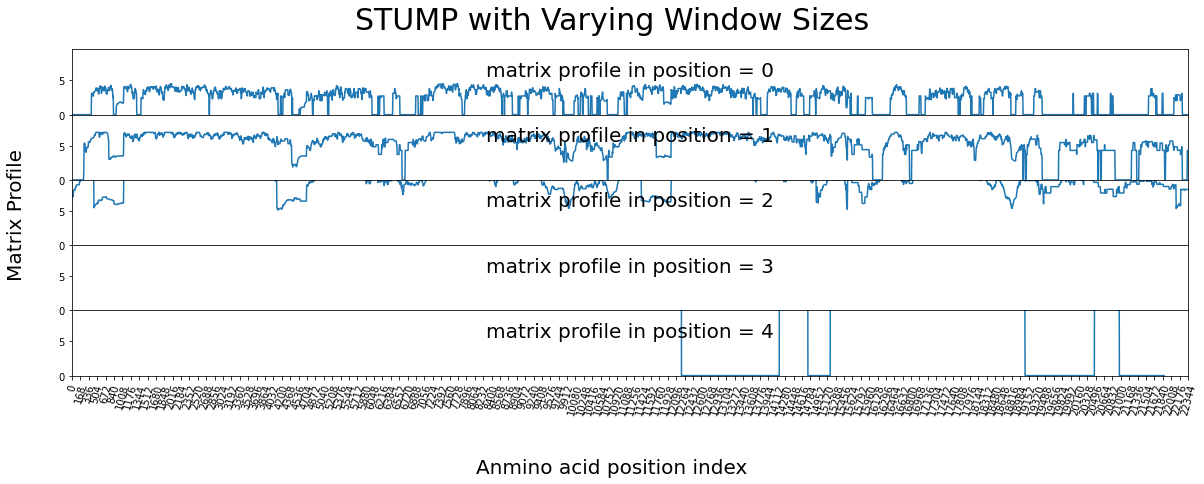

14.284978151321411


In [ ]:
start = time.time()
Patient_MULTIPLIER = 7  # Specify for the amount of patient you want between each labeled x-axis tick
fig, axs = plt.subplots(5, sharex=True, gridspec_kw={'hspace': 0})
fig.text(0.5, -0.1, 'Anmino acid position index', ha='center', fontsize='20')
fig.text(0.08, 0.5, 'Matrix Profile', va='center', rotation='vertical', fontsize='20')
for i, varying_m in enumerate(days_df['m'].values):
    mp = stumpy.stump(unpickled_df[613], varying_m)
    axs[i].plot(mp[:, 0])
    axs[i].set_ylim(0,9.5)
    axs[i].set_xlim(0,3600)
    title = f"matrix profile in position = {i}"
    axs[i].set_title(title, fontsize=20, y=.5)
plt.xticks(np.arange(0, unpickled_df.shape[0], (48*Patient_MULTIPLIER)/2))
plt.xticks(rotation=75)
plt.suptitle('STUMP with Varying Window Sizes', fontsize='30')
plt.show()
print(time.time()-start)

#Unseful items (Please ignore this part)

Notice that it took around 5 seconds to analyze since most of the time was spent Numba JIT-compiling the function for first use. However, if we re-run it, it should be a lot faster:

In [ ]:
start = time.time()
DAY_MULTIPLIER = 7  # Specify for the amount of days you want between each labeled x-axis tick
fig, axs = plt.subplots(unpickled_df.shape[1], sharex=True, gridspec_kw={'hspace': 0})
fig.text(0.5, -0.1, 'Anmino acid position index', ha='center', fontsize='20')
fig.text(0.08, 0.5, 'Matrix Profile', va='center', rotation='vertical', fontsize='20')
for i in range(unpickled_df.shape[1]):
    mp = stumpy.gpu_stump(unpickled_df[i], 100)
    axs[i].plot(mp[:, 0])
    axs[i].set_ylim(0,9.5)
    axs[i].set_xlim(0,3600)
    title = f"matrix profile in position = {i}"
    axs[i].set_title(title, fontsize=20, y=.5)
plt.xticks(np.arange(0, unpickled_df.shape[0], (48*DAY_MULTIPLIER)/2))
plt.xticks(rotation=75)
plt.suptitle('STUMP with Varying Window Sizes', fontsize='30')
plt.show()
print(time.time()-start)

In [ ]:
start = time.time()
mp = stumpy.stump(unpickled_df[613], 50, ignore_trivial=True)
print(time.time()-start)

There we go! Now, let's try the same analysis using the GPU by calling the `stumpy.gpu_stump` function:

In [ ]:
start = time.time()
mp = stumpy.gpu_stump(unpickled_df[613], 50, ignore_trivial=True)
print(time.time()-start)

It appears that the GPU analysis takes around the same amount of time as the CPU does but, in fact, the majority of the time is spent sending the data from the host (CPU) to the (GPU) device. For a longer time series like `long_ts`, it will take around 2+ hours to analyze the data on a CPU (so we'll avoid that here) but it should take around 6 minutes on our GPU!

In [ ]:
start = time.time()
mp = stumpy.gpu_stump(long_ts, 50, ignore_trivial=True)
print(time.time()-start)

And, Voila! Congratulations, you've just executed STUMPY on GPUs. For more information, please check out our [documentation](https://stumpy.readthedocs.io/en/latest/index.html) and feel free to [submit an issue](https://github.com/TDAmeritrade/stumpy/issues) on [Github](https://github.com/TDAmeritrade/stumpy) if you encounter any problems. 